Analyzing the Boston House Pricing Database using simple t-tests and correlation

In [2]:
# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s" % pd.__version__)

# Module for plotting
import matplotlib 
print("Maplotlib version:    %6.6s" % matplotlib.__version__)
%matplotlib inline
# needed for inline plots in notebooks
import matplotlib.pyplot as plt  

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s" % sklearn.__version__)

Numpy version:        1.13.1
SciPy version:        0.19.1
Pandas version:       0.20.3
Maplotlib version:     2.0.2
Scikit-Learn version: 0.19.0


Loading the dataset:

In [3]:
from sklearn.datasets import load_boston
bdata = load_boston()

Basic info about the dataset:

In [4]:
print (bdata.keys())
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)
print (bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

In [5]:
boston = pd.DataFrame(bdata.data)
target = pd.DataFrame(bdata.target, columns=["MEDV"])

In [6]:
boston.columns = bdata.feature_names[:]
bostonTarget = boston.join(target)
print (boston.shape)

(506, 13)


## Descriptive analysis

In [7]:
print(boston.shape[1]  , "variables")
print(boston.shape[0]  , "observations")
print(len(boston[(boston['CHAS']>0)]))
print(boston[boston.isnull().any(axis=1)])
print(bostonTarget.sort_values('MEDV', ascending=False).head(5)['TAX'])

13 variables
506 observations
35
Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]
Index: []
283    198.0
225    307.0
369    666.0
370    666.0
371    666.0
Name: TAX, dtype: float64


Simple Questions
 -What is the median housing price in Boston's most expensive neighborhood?
 -How many neighborhoods have, on average, less than 5 rooms per dwelling?
 -What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 -What is the crime rate in the neighborhood with the highest median housing price? 
 -What is the crime rate in the neighborhood with the lowest median housing price?

In [8]:
print(bostonTarget.sort_values('MEDV', ascending=False).head(1)['MEDV'])
print(len(boston[(boston['RM']<5)]))
print(bostonTarget[(bostonTarget['CHAS']>0)].sort_values('MEDV', ascending=False).head(1)['MEDV'])
print(bostonTarget.sort_values('MEDV', ascending=False).head(1)['CRIM'])
print(bostonTarget.sort_values('MEDV').head(1)['CRIM'])

283    50.0
Name: MEDV, dtype: float64
15
372    50.0
Name: MEDV, dtype: float64
283    0.01501
Name: CRIM, dtype: float64
398    38.3518
Name: CRIM, dtype: float64


### Summary statistics


In [9]:
# enter your code here
summary = bostonTarget.describe().transpose()[['count','mean','std','min','50%','max']]
summary

,count,mean,std,min,50%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.25651,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.00000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,9.69000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.00000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.53800,0.8710
RM,506.0,6.284634,0.702617,3.56100,6.20850,8.7800
AGE,506.0,68.574901,28.148861,2.90000,77.50000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,3.20745,12.1265
RAD,506.0,9.549407,8.707259,1.00000,5.00000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,330.00000,711.0000


### T-test

In [11]:
t, p = sp.stats.ttest_ind(bostonTarget[(bostonTarget['CHAS']>0)]['MEDV'],bostonTarget[(bostonTarget['CHAS']<1)]['MEDV'])
print("t = " + str(t))
print("p = " + str(2*p)) #two sided t-test

t = 3.99643746609
p = 0.00014781246341


We set up a t-test with the following hypothesis:
Null Hypothesis: The prices of the two locations are equivalent
Alternative Hypothesis: The prices of the two locations are not equivalent

After running the t-test, the extrememly small p-value of "0.00014781246341" tells us that we must reject the null hypothesis that prices are equivalent for the alternative.

## Visualizations


### Histogram of housing prices

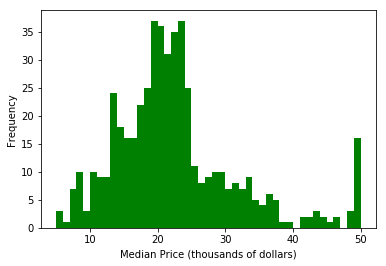

In [12]:
plt.hist(bdata.target, bins=np.arange(min(bdata.target), max(bdata.target) + 1, 1), color="green")
plt.xlabel("Median Price (thousands of dollars)")
plt.ylabel("Frequency")
plt.show()

### Scatter plot of housing prices and crime

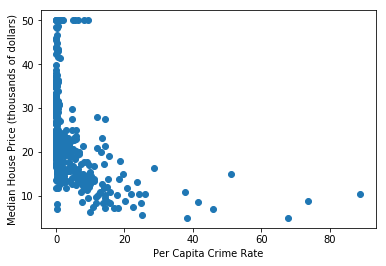

-0.38583168988399058

In [14]:
plt.scatter(boston['CRIM'],bdata.target)
plt.xlabel("Per Capita Crime Rate")
plt.ylabel("Median House Price (thousands of dollars)")
plt.show()

boston['CRIM'].corr(bostonTarget['MEDV'])

From the graph above, it seems as the median house price falls, the per capita crime rate increases. There does appear to be a relationship between the two variables, but we cannot make any causal claims. We can say that there is a correlation between the two variables. Calculating the correlation shows a r^2 value of -0.38583168988399058. Thus we can say that there is slightly larger than small negative correlation between the two variables. As mentioned above, we can still not infer causality from this. There could be many different lurking variables that could cause these phenomena to occur.

### Correlation Matrix

In [120]:
corr = boston.corr()
def color_values(val):
    color = 'rgba(255, 0, 0,'+str(abs(val))+')' if val < 0 else 'rgba(0, 255, 0,'+str(val)+')'
    return 'background-color: %s' % color
corr.style.applymap(color_values)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1,-0.199458,0.404471,-0.0552953,0.417521,-0.21994,0.350784,-0.377904,0.622029,0.579564,0.28825,-0.377365,0.45222
ZN,-0.199458,1,-0.533828,-0.0426967,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.17552,-0.412995
INDUS,0.404471,-0.533828,1,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.72076,0.383248,-0.356977,0.6038
CHAS,-0.0552953,-0.0426967,0.062938,1,0.0912028,0.0912512,0.0865178,-0.0991758,-0.00736824,-0.0355865,-0.121515,0.0487885,-0.0539293
NOX,0.417521,-0.516604,0.763651,0.0912028,1,-0.302188,0.73147,-0.76923,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.21994,0.311991,-0.391676,0.0912512,-0.302188,1,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.350784,-0.569537,0.644779,0.0865178,0.73147,-0.240265,1,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.377904,0.664408,-0.708027,-0.0991758,-0.76923,0.205246,-0.747881,1,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.622029,-0.311948,0.595129,-0.00736824,0.611441,-0.209847,0.456022,-0.494588,1,0.910228,0.464741,-0.444413,0.488676
TAX,0.579564,-0.314563,0.72076,-0.0355865,0.668023,-0.292048,0.506456,-0.534432,0.910228,1,0.460853,-0.441808,0.543993


Weighted distances to five Boston employment centres and nitric oxides concentration (parts per 10 million) seem to be the most negatively correlated.
Besides the variables being correlated to themselves, the index of accessibility to radial highways and full-value property-tax rate per $10,000 seem to be the most positively correlated.

## Another Visualization

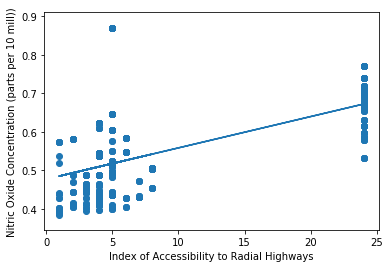

Regression Equation: y = 0.00813715408936 x + 0.476990062135
Starting at ~.008, for every interval of Index of Accessibility to Radial Highways there is a ~.477 parts per 10 million increase in Nitric Oxide Concentrations 


In [15]:
plt.scatter(boston['RAD'],boston["NOX"])
plt.xlabel("Index of Accessibility to Radial Highways")
plt.ylabel("Nitric Oxide Concentration (parts per 10 mill))")
poly = np.polyfit(boston['RAD'], boston["NOX"], 1)
plt.plot(boston['RAD'], np.poly1d(poly)(boston['RAD']))
plt.show()
print("Regression Equation: y =" , poly[0] , "x +" , poly[1])
print("Starting at ~.008, for every interval of Index of Accessibility to Radial Highways there is a ~.477 parts per 10 million increase in Nitric Oxide Concentrations ")